In [116]:
%pylab widget
from copy import deepcopy
from reed_up_downstream_res import ReedSimulation, calc_fixed_point
from json_object import JSONObject
from pypevoc.PVAnalysis import PV

Populating the interactive namespace from numpy and matplotlib


In [101]:
with open('short_reed_simulation.json') as f:
    js = JSONObject(f)
    
js['environment/blowing pressure']=2500
js['simulation/duration']=.4
js['tracts/vocal/frequency independent losses']=0.3

In [103]:
sim = ReedSimulation()
sim.from_json(js)

In [104]:
def calc_fixed_point(sim, eps=1e-5):
    sim_rev = deepcopy(sim)
    dvt = eps*1000
    for tname, tract in sim_rev.tracts.items():
        tract.reflection_coeff = 1/tract.reflection_coeff

    sim_rev.pert=False
    sim_rev.simulation_init(pert=False)
    vt_delay = max(sim_rev.tracts['vocal'].total_delay, 
                    sim_rev.tracts['bore'].total_delay)
    while dvt>eps:
        sim_rev.simulation_tick(reverse=True)
        if sim_rev.samp_no>vt_delay:
            p_in_old = sim_rev.p_in[-vt_delay] + sim_rev.p_vt_in[-vt_delay]
            p_in = sim_rev.p_in[-1] + sim_rev.p_vt_in[-vt_delay]
            dvt = np.abs((p_in - p_in_old)/(p_in + p_in_old)*2 )
    print('Simulated {} samples in reverse'.format(sim_rev.samp_no))
    return sim_rev.p_out[-1], sim_rev.p_in[-1], sim_rev.p_vt_out[-1], sim_rev.p_vt_in[-1]

fixed_pts = calc_fixed_point(sim)

Simulated 4801 samples in reverse


In [105]:
sim.set_fixed_points(fixed_pts)
sim.simulate()

filled bore with 380.1430057871718, return is -376.3415757293001, expected -376.34421155301925
filled vocal with -62.57666005936397, return is 43.80366204155477, expected 43.80435487910038
applied perturbation at sample 97


In [106]:
p_b = sim.p_in + sim.p_out;
p_vt = sim.p_vt_in + sim.p_vt_out;

u = (sim.p_out - sim.p_in)/sim.zc_b;
u_sg = -(sim.p_vt_out - sim.p_vt_in)/sim.zc_vt

a = sim.a

FigureCanvasNbAgg()

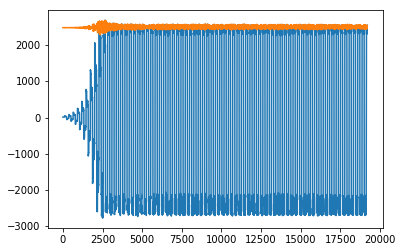

In [117]:
figure()
plot(p_b)
plot(sim.p_blow+p_vt)

/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:171: RuntimeWarning: divide by zero encountered in true_divide
  frat = fx / self.oldfft
/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:171: RuntimeWarning: invalid value encountered in true_divide
  frat = fx / self.oldfft


FigureCanvasNbAgg()

/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:335: RuntimeWarning: divide by zero encountered in log10
  mag = 20*np.log10(self.mag)


(0, 1000)

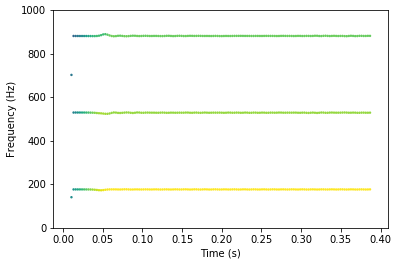

In [119]:
pv = PV(p_b,sr=sim.sr,nfft=512*2,hop=128)
pv.run_pv()
pv.plot_time_freq()
ylim(0,1000)

FigureCanvasNbAgg()

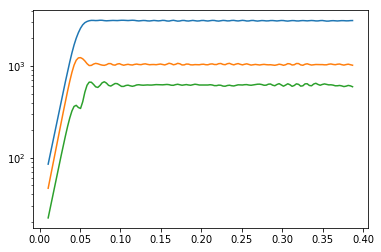

In [120]:
figure()

semilogy(pv.t,pv.mag[:,:3])

/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:171: RuntimeWarning: divide by zero encountered in true_divide
  frat = fx / self.oldfft
/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:171: RuntimeWarning: invalid value encountered in true_divide
  frat = fx / self.oldfft


FigureCanvasNbAgg()

/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:335: RuntimeWarning: divide by zero encountered in log10
  mag = 20*np.log10(self.mag)


(0, 1000)

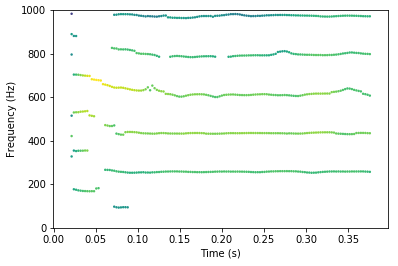

In [122]:
pv = PV(p_vt,sr=sim.sr,nfft=512*4,hop=128,pkthresh=1e-9,npks=100)
pv.run_pv()
pv.plot_time_freq()
ylim(0,1000)

(0, 1000)

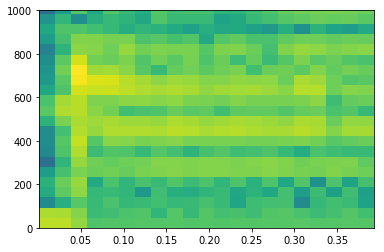

In [111]:
figure()
specgram(p_vt,Fs=sim.sr,NFFT=2**10);
ylim(0,1000)

In [123]:
js['tracts'].visititems(print)

['vocal', 'description'] single wide pipe
['vocal', 'frequency independent losses'] 0.3
['vocal', 'elements', 0, 'type'] cylinder
['vocal', 'elements', 0, 'length'] 0.15
['vocal', 'elements', 0, 'radius'] 0.02
['vocal', 'elements', 0, 'loss_multiplier'] 5
['vocal', 'elements', 1, 'type'] termination
['vocal', 'elements', 1, 'kind'] open
['bore', 'description'] single clarinet-like cylinder
['bore', 'frequency independent losses'] 0.01
['bore', 'elements', 0, 'type'] cylinder
['bore', 'elements', 0, 'length'] 0.5
['bore', 'elements', 0, 'radius'] 0.0075
['bore', 'elements', 0, 'loss_multiplier'] 1
['bore', 'elements', 1, 'type'] termination
['bore', 'elements', 1, 'kind'] open
